In [95]:
import pandas as pd
df = pd.read_csv('anomaly.csv')
print(df.head())

       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good


In [96]:
df.drop(['Date'], axis = 1, inplace= True)
df.dropna(inplace=True, axis=1)

In [97]:
df.Quality[df.Quality=='Good'] = 1
df.Quality[df.Quality=='Bad'] = 2

C:\Users\vijay\AppData\Local\Temp\ipykernel_18760\2393131083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality=='Good'] = 1
C:\Users\vijay\AppData\Local\Temp\ipykernel_18760\2393131083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality=='Bad'] = 2


In [98]:
good_mask = df['Quality']== 1 #All good to be True for good data points
bad_mask = df['Quality']== 2 #All values False for bad data points

In [108]:
df1 = pd.DataFrame()
df1['Quality'] = df['Quality']
print(type(df1))
df.drop(['Quality'], axis=1, inplace=True)
print(df)

<class 'pandas.core.frame.DataFrame'>
      Power  Detector
0        96         8
1        96        10
2        91         8
3        97         9
4        91        11
...     ...       ...
1456     93         8
1457     91        10
1458     95         8
1459     91        10
1460    100        12

[1461 rows x 2 columns]


In [109]:
df_good = df[good_mask]
df_bad = df[bad_mask]
print(df_good)

      Power  Detector
0        96         8
1        96        10
2        91         8
3        97         9
4        91        11
...     ...       ...
1456     93         8
1457     91        10
1458     95         8
1459     91        10
1460    100        12

[1054 rows x 2 columns]


In [110]:
print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

Good count: 1054
Bad count: 407


In [111]:
x_good = df_good.values
x_bad = df_bad.values
print(x_good)

[[ 96   8]
 [ 96  10]
 [ 91   8]
 ...
 [ 95   8]
 [ 91  10]
 [100  12]]


In [142]:
total_value = pd.concat([df_good,df_bad], axis=0, ignore_index=True)
total1 = total_value.values
print(total1)

[[96  8]
 [96 10]
 [91  8]
 ...
 [86 11]
 [82  9]
 [80  8]]


In [113]:
random_good = df_good.sample(frac=0.901)  #950
test_good = df_good.drop(random_good.index) #104
random_bad = df_bad.sample(frac=0.123)  #50
test_bad = df_bad.drop(random_bad.index)  #357

training_set = pd.concat([random_good,random_bad],axis=0,ignore_index=True) #1000
test_set = pd.concat([test_good,test_bad],axis=0,ignore_index=True) #461
print(len(test_set))
print(len(test_bad))

461
357


In [114]:
# from sklearn.model_selection import train_test_split
# # split 75 percent of data into training set and other 25 percent to testing set and set the randomizing during split as 42
# x_train= train_test_split(
#         training_set, random_state=42)

In [115]:
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [116]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(x_good.shape[1]))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 3)                 33        
                                                                 
 dense_26 (Dense)            (None, 10)                40        
                                                                 
 dense_27 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
model.fit(training_set,training_set ,verbose=1, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 4532.1235
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4394.9175
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4151.7881
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3757.7104
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3191.9412
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 2496.6851
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1793.5763
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1210.7087
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 790.5388
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 507.6892
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 321.4855
Epoch 12/100
32/32 [==============================] - 0s 4ms/step - loss: 200.9298
Epoch

In [118]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 3)                 33        
                                                                 
 dense_26 (Dense)            (None, 10)                40        
                                                                 
 dense_27 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
print(test_set)

     Power  Detector
0       96         8
1       95         8
2       90        11
3       99         8
4       93        12
..     ...       ...
456     83        10
457     82         9
458     80        12
459     82         9
460     80         8

[461 rows x 2 columns]


In [139]:
pred = model.predict(test_set)
print(pred)
score1 = np.sqrt(metrics.mean_squared_error(pred,test_set))
print(score1)

15/15 [==============================] - 0s 2ms/step
[[ 95.368416   10.05398  ]
 [ 94.40939     9.957686 ]
 [ 90.42337     9.557458 ]
 [ 98.245476   10.34286  ]
 [ 93.57012     9.873417 ]
 [ 97.40621    10.258592 ]
 [ 93.45037     9.861393 ]
 [ 93.30043     9.846338 ]
 [ 90.42337     9.557458 ]
 [100.01358    10.520392 ]
 [ 97.13652    10.231512 ]
 [ 97.55615    10.273646 ]
 [ 90.57331     9.572513 ]
 [ 93.03074     9.819259 ]
 [ 97.13652    10.231512 ]
 [ 98.245476   10.34286  ]
 [ 93.98977     9.915552 ]
 [ 91.53233     9.668806 ]
 [ 93.98977     9.915552 ]
 [ 99.20449    10.439154 ]
 [ 95.9078     10.108139 ]
 [ 92.61109     9.7771225]
 [ 95.6381     10.0810585]
 [ 95.48816    10.066004 ]
 [ 96.32743    10.150273 ]
 [ 90.15367     9.530377 ]
 [ 96.59712    10.177353 ]
 [ 98.095535   10.3278055]
 [ 91.652084    9.68083  ]
 [ 96.86683    10.2044325]
 [ 92.76104     9.792178 ]
 [ 99.47418    10.466233 ]
 [ 94.52915     9.969711 ]
 [ 94.52915     9.969711 ]
 [ 97.40621    10.258592 ]
 [

In [120]:
pred = model.predict(training_set)
score1 = np.sqrt(metrics.mean_squared_error(pred,training_set))
print(score1)

32/32 [==============================] - 0s 4ms/step
1.1689219346767588


In [141]:
thresholds = [1.5, 1.7, 2.0]
for threshold in thresholds:
    col_name = f'Detection_{threshold}'
    df[col_name] = 'NAN'

for i in range(len(df)):
    input_data = total1[i].reshape(1, -1)  
    print(input_data)
    pred = model.predict(input_data)
    mse = np.sqrt(metrics.mean_squared_error(pred, input_data))
    print(mse)
    

    for threshold in thresholds:
        col_name = f'Detection_{threshold}'
        if mse > threshold:
            df.at[i, col_name] = 'Bad'
        else:
            df.at[i, col_name] = 'Good'
print(df)
df.to_csv('final_result.csv', index=False)


[[96  8]]
1/1 [==============================] - 0s 51ms/step
1.519496877138737
[[96 10]]
1/1 [==============================] - 0s 42ms/step
0.1004866133082032
[[91  8]]
1/1 [==============================] - 0s 90ms/step
1.1521413953905273
[[97  9]]
1/1 [==============================] - 0s 39ms/step
0.879906356218159
[[91 11]]
1/1 [==============================] - 0s 40ms/step
0.9895989717762692
[[100   8]]
1/1 [==============================] - 0s 52ms/step
1.8141534857188708
[[95  8]]
1/1 [==============================] - 0s 32ms/step
1.4459161662156126
[[94  8]]
1/1 [==============================] - 0s 31ms/step
1.3723840710396173
[[99 12]]
1/1 [==============================] - 0s 34ms/step
1.1189248118783686
[[100  12]]
1/1 [==============================] - 0s 44ms/step
1.0464417081674164
[[92 11]]
1/1 [==============================] - 0s 41ms/step
0.9162293447153179
[[97 11]]
1/1 [==============================] - 0s 28ms/step
0.5519110049349765
[[99 12]]
1/1 [===========

KeyboardInterrupt: 

In [135]:

predicted_onepointfive = df['Detection_1.5']
predicted_onepointseven = df['Detection_1.7']
predicted_two = df['Detection_2.0']
df1.Quality[df1.Quality==1] = 'Good'
df1.Quality[df1.Quality==2] = 'Bad'
print(df1['Quality'])
classification_onepointfive = pd.concat([predicted_onepointfive],axis=1)
classification_onepointseven = pd.concat([predicted_onepointseven],axis=1)
classification_two = pd.concat([predicted_two],axis=1)
print(classification_onepointfive )
print(type(classification_onepointfive ))

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
1456    Good
1457    Good
1458    Good
1459    Good
1460    Good
Name: Quality, Length: 1461, dtype: object
     Detection_1.5
0              Bad
1             Good
2             Good
3             Good
4             Good
...            ...
1456           Bad
1457          Good
1458          Good
1459          Good
1460          Good

[1461 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


[[114 352]
 [293 702]]


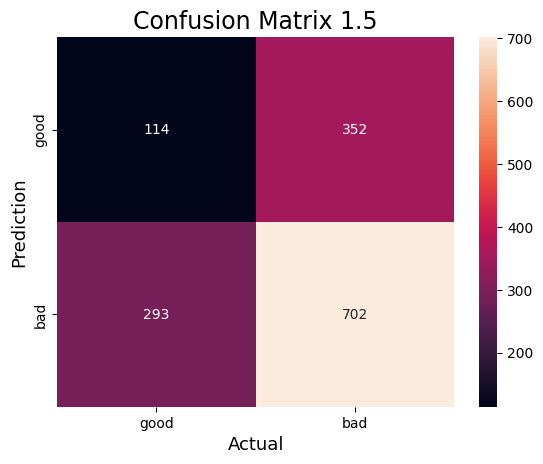

[[114 352]
 [293 702]]


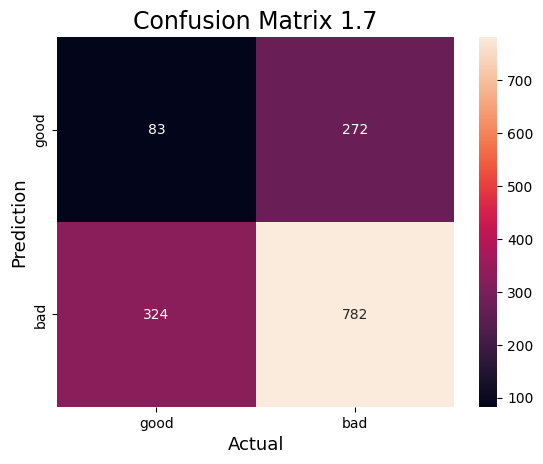

[[114 352]
 [293 702]]


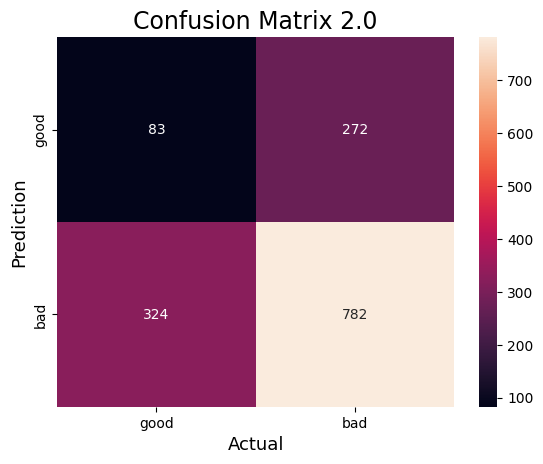

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(classification_onepointfive ,df1['Quality'])
print(confusion)
sns.heatmap(confusion, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 1.5',fontsize=17)
plt.show()

confusion1 = confusion_matrix(classification_onepointseven ,df1['Quality'])
print(confusion)
sns.heatmap(confusion1, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 1.7',fontsize=17)
plt.show()


confusion2 = confusion_matrix(classification_two ,df1['Quality'])
print(confusion)
sns.heatmap(confusion1, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 2.0',fontsize=17)
plt.show()